In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import *
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset
data = load_wine()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names


def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0,
                                       criterion = crit, 
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    dot_data = tree.export_graphviz(estimator,
                                    out_file=None, 
                                    feature_names=labels, 
                                    class_names=['0', '1', '2'], 
                                    filled = True)
    graph = Source(dot_data)

    display(SVG(graph.pipe(format='svg')))
    return estimator

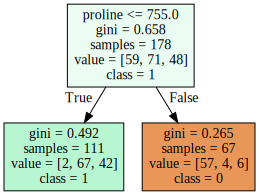

In [20]:
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=list(range(1, 11))
   , min_split=(2, 150)
   , min_leaf=(2, 150))

display(inter)

In [ ]:
data.feature_names